In [1]:
import pandas as pd
import numpy as np

In [4]:
import pandas as pd

# Try loading the uploaded CSV file
df = pd.read_csv("synthetic_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,No,50,Yes,No phone service,Fiber optic,Yes,...,Yes,No internet service,No internet service,No,One year,No,Bank transfer (automatic),52.01,2600.50,No
1,CUST0001,Female,0,No,Yes,46,Yes,No phone service,No,No,...,Yes,No internet service,Yes,No,One year,No,Credit card (automatic),23.72,1091.12,No
2,CUST0002,Male,0,No,Yes,3,Yes,Yes,Fiber optic,Yes,...,No internet service,No internet service,No internet service,Yes,Month-to-month,Yes,Mailed check,56.09,168.27,No
3,CUST0003,Male,0,No,Yes,6,Yes,No phone service,Fiber optic,Yes,...,No internet service,Yes,No,Yes,One year,No,Mailed check,21.75,130.50,Yes
4,CUST0004,Male,0,Yes,No,34,Yes,No phone service,Fiber optic,No internet service,...,Yes,Yes,No internet service,Yes,Two year,No,Credit card (automatic),39.24,1334.16,No


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df['TotalCharges'].dtype

dtype('float64')

In [7]:
df['Churn'].value_counts()

Churn
No     749
Yes    251
Name: count, dtype: int64

In [8]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.749
Yes    0.251
Name: proportion, dtype: float64

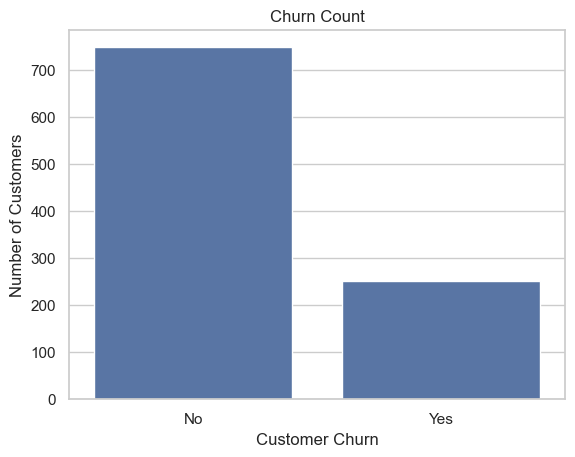

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better visuals
sns.set(style="whitegrid")

# Plot the churn count
sns.countplot(x='Churn', data=df)
plt.title('Churn Count')
plt.xlabel('Customer Churn')
plt.ylabel('Number of Customers')
plt.show()

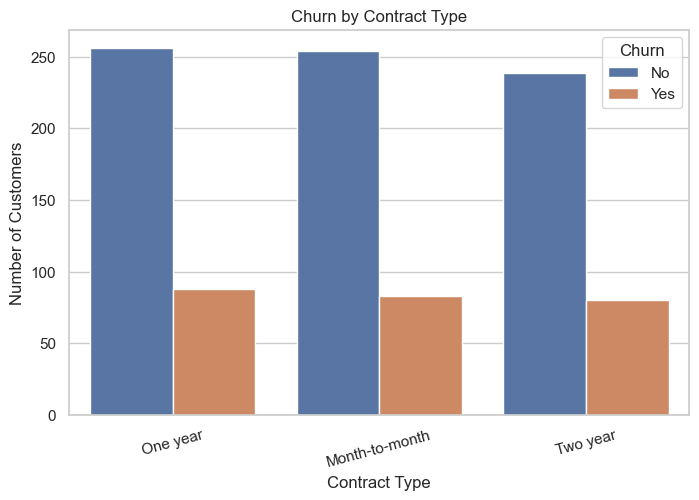

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.xticks(rotation=15)
plt.show()

In [11]:
# Drop customerID — it's just a label
df = df.drop('customerID', axis=1)

In [13]:
# Convert all categorical columns to numbers
df_encoded = pd.get_dummies(df, drop_first=True)

In [14]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# These are tools we need for modeling and evaluation
from sklearn.linear_model import LogisticRegression  # The model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # To check how well it performs


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

# Fit the scaler only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler on test data
X_test_scaled = scaler.transform(X_test)

In [19]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [20]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.735

Confusion Matrix:
[[147   1]
 [ 52   0]]

Classification Report:
              precision    recall  f1-score   support

       False       0.74      0.99      0.85       148
        True       0.00      0.00      0.00        52

    accuracy                           0.73       200
   macro avg       0.37      0.50      0.42       200
weighted avg       0.55      0.73      0.63       200



In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.735


In [22]:
from sklearn.linear_model import LogisticRegression

# Tell the model to pay more attention to churners
model_balanced = LogisticRegression(class_weight='balanced', max_iter=1000)

# Train it using the scaled data
model_balanced.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [23]:
# Predict churn again using the new model
y_pred_balanced = model_balanced.predict(X_test_scaled)

# Check how it performs
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_balanced))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_balanced))

Accuracy: 0.57

Confusion Matrix:
[[88 60]
 [26 26]]

Classification Report:
              precision    recall  f1-score   support

       False       0.77      0.59      0.67       148
        True       0.30      0.50      0.38        52

    accuracy                           0.57       200
   macro avg       0.54      0.55      0.52       200
weighted avg       0.65      0.57      0.60       200



In [24]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [25]:
# Predict on the test set
rf_preds = rf_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, rf_preds))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_preds))
print("\nClassification Report:")
print(classification_report(y_test, rf_preds))

Accuracy: 0.735

Confusion Matrix:
[[147   1]
 [ 52   0]]

Classification Report:
              precision    recall  f1-score   support

       False       0.74      0.99      0.85       148
        True       0.00      0.00      0.00        52

    accuracy                           0.73       200
   macro avg       0.37      0.50      0.42       200
weighted avg       0.55      0.73      0.63       200



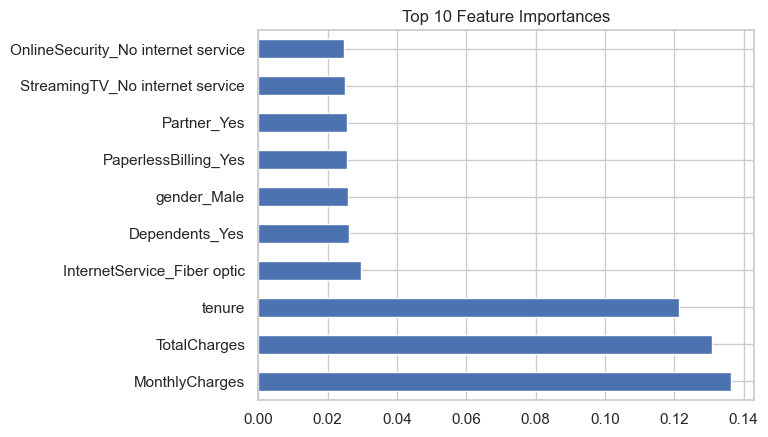

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()